<a href="https://colab.research.google.com/github/WajdAlsuhaymi/IT326-DataMining-Group2/blob/main/Reports/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 2 – Data Summarization and Preprocessing

This phase focuses on analyzing and preparing the dataset before applying data mining techniques.
It includes summarizing data, visualizing relationships, handling missing values, and applying preprocessing techniques such as encoding, normalization, and outlier removal.

### **Part** 1 : Data Summarization

In [ ]:

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/WajdAlSuhaymi/IT326-DataMining-Group2/main/Dataset/Raw_dataset.csv')  # Replace with your actual file path
df.head()


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# General Information and Missing Values
print("Dataset Shape:", df.shape)
df.info()

# Missing values summary
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


Dataset Shape: (2004, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 156.7+ KB


,0
Platform,1004
Gender,1004
Likes_Received_Per_Day,1004
Comments_Received_Per_Day,1004
Daily_Usage_Time (minutes),1004
Posts_Per_Day,1004
Messages_Sent_Per_Day,1004
Dominant_Emotion,1004
Age,1003
User_ID,1003


In [ ]:
# Statistical Summary
df.describe().T  # Includes five-number summary for numeric columns


,count,mean,std,min,25%,50%,75%,max
Daily_Usage_Time (minutes),1000.0,95.950,38.850442,40.0,65.00,85.0,120.0,200.0
Posts_Per_Day,1000.0,3.321,1.914582,1.0,2.00,3.0,4.0,8.0
Likes_Received_Per_Day,1000.0,39.898,26.393867,5.0,20.00,33.0,55.0,110.0
Comments_Received_Per_Day,1000.0,15.611,8.819493,2.0,8.00,14.0,22.0,40.0
Messages_Sent_Per_Day,1000.0,22.560,8.516274,8.0,17.75,22.0,28.0,50.0


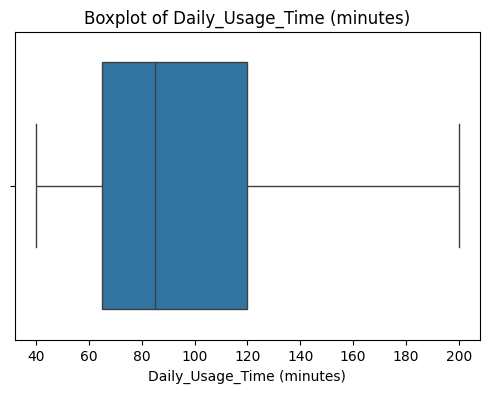

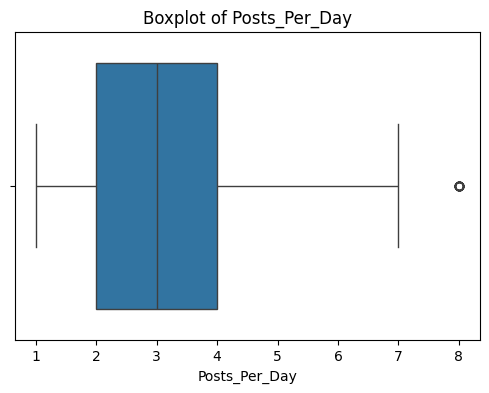

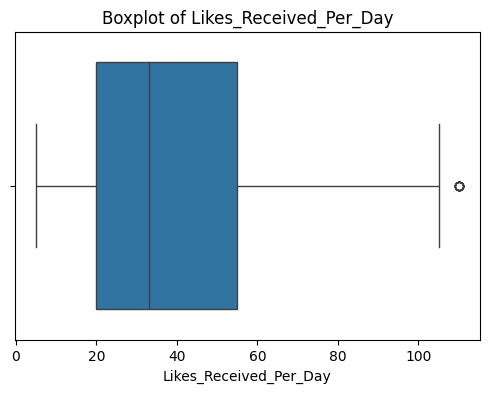

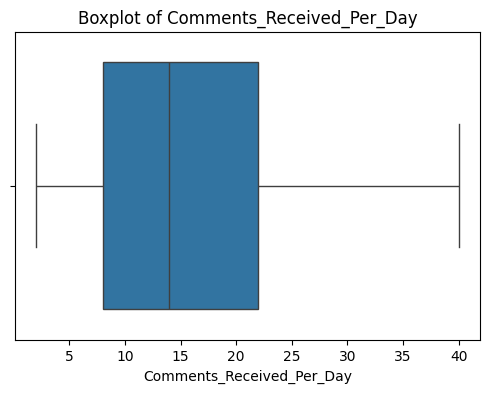

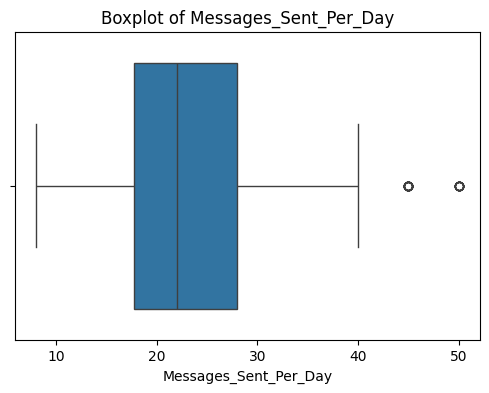

In [ ]:
# Boxplots and Outlier Detection
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


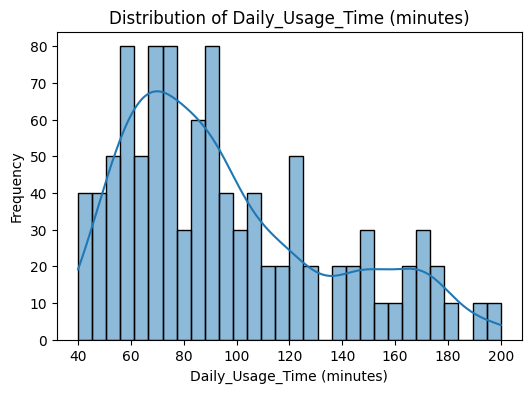

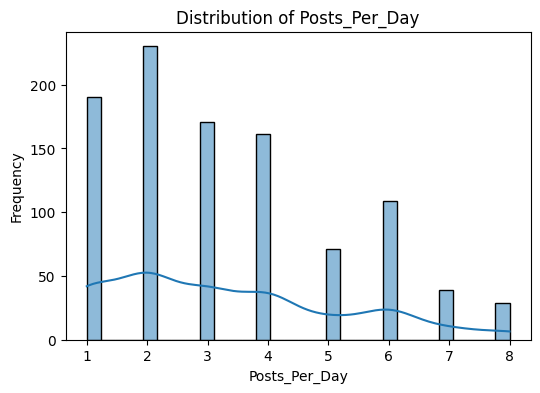

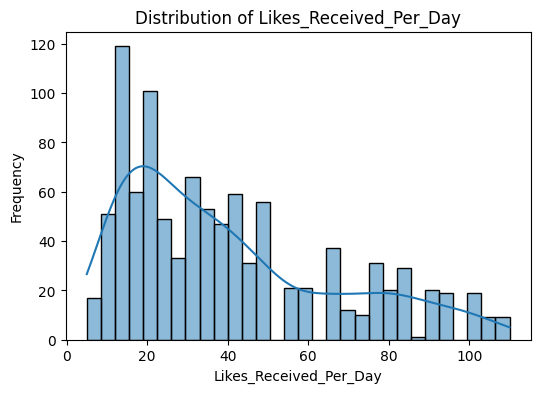

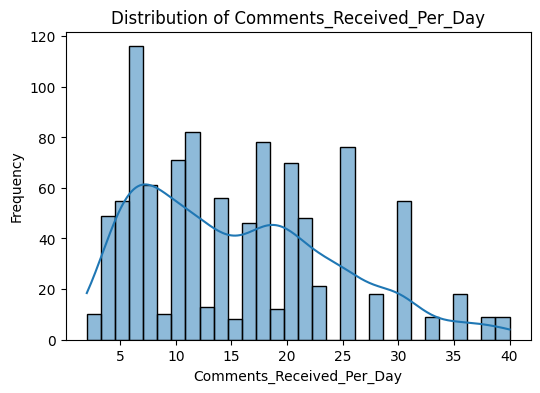

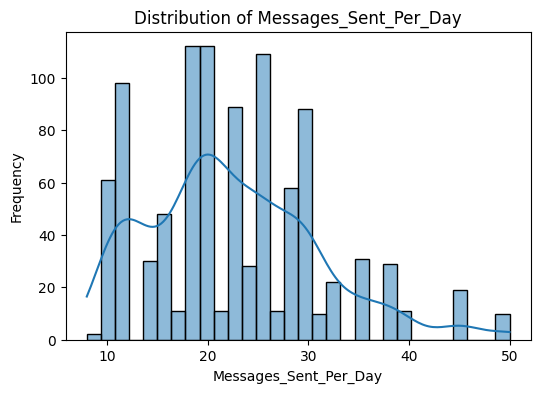

In [ ]:
# Histograms for Numeric Distributions
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


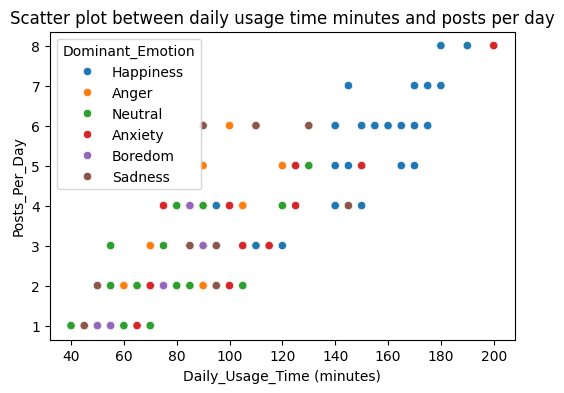

In [ ]:
# Scatter Plot (Pairwise Comparison)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Daily_Usage_Time (minutes)', y='Posts_Per_Day', hue='Dominant_Emotion')
plt.title('Scatter plot between daily usage time minutes and posts per day')
plt.show()


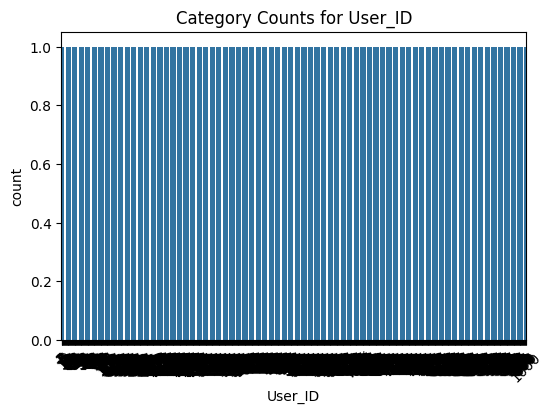

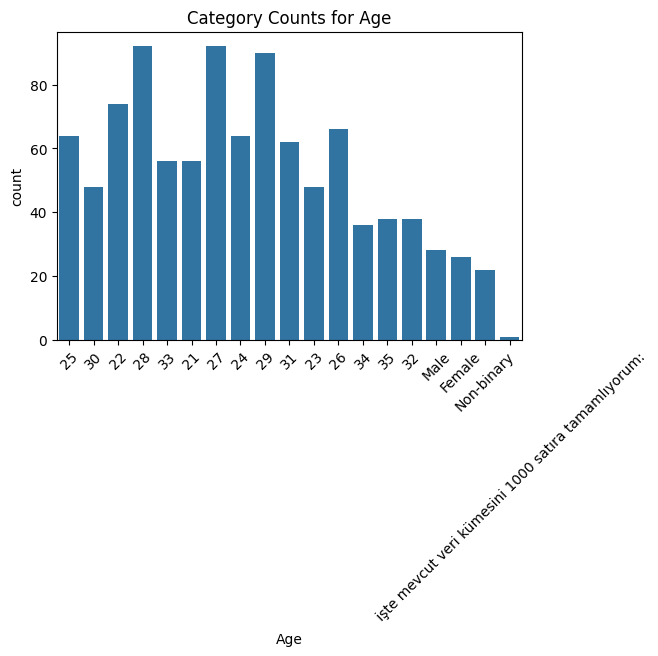

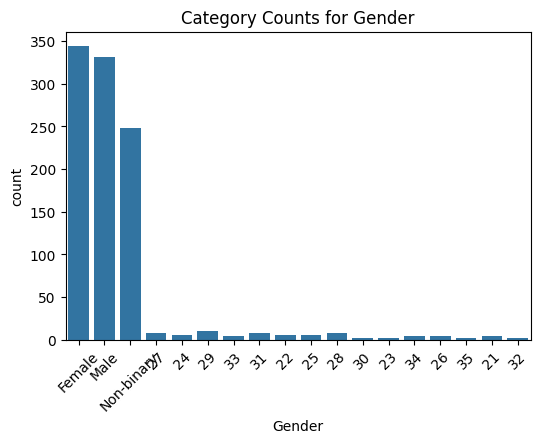

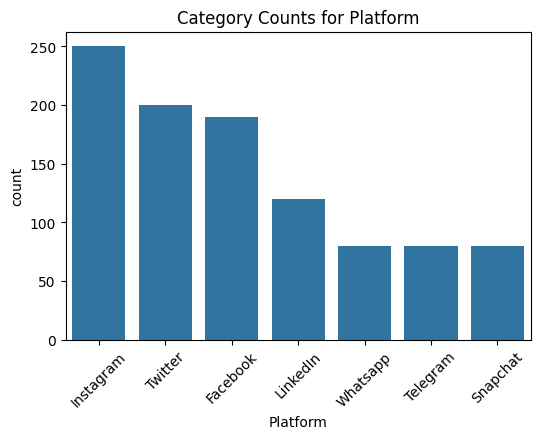

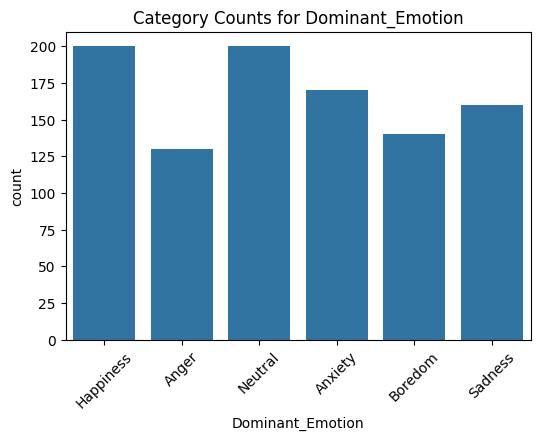

In [ ]:
# Bar Plots for Categorical Features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Category Counts for {col}')
    plt.xticks(rotation=45)
    plt.show()


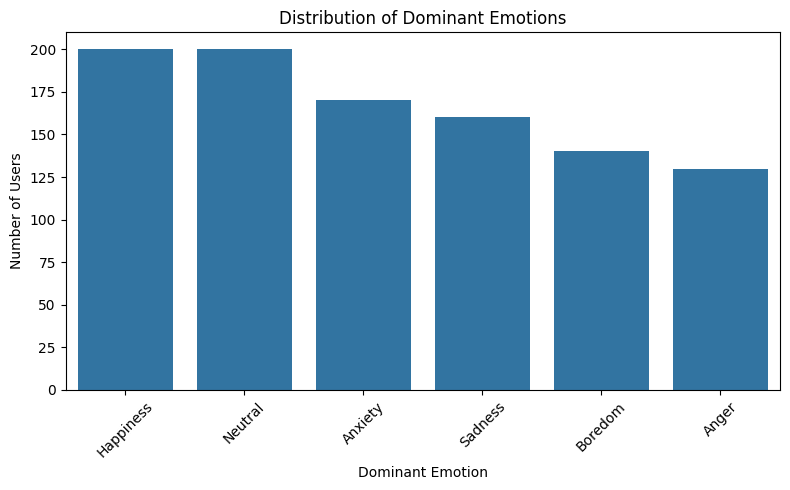

In [ ]:
# Class Label Distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Dominant_Emotion', order=df['Dominant_Emotion'].value_counts().index)
plt.title('Distribution of Dominant Emotions')
plt.xlabel('Dominant Emotion')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


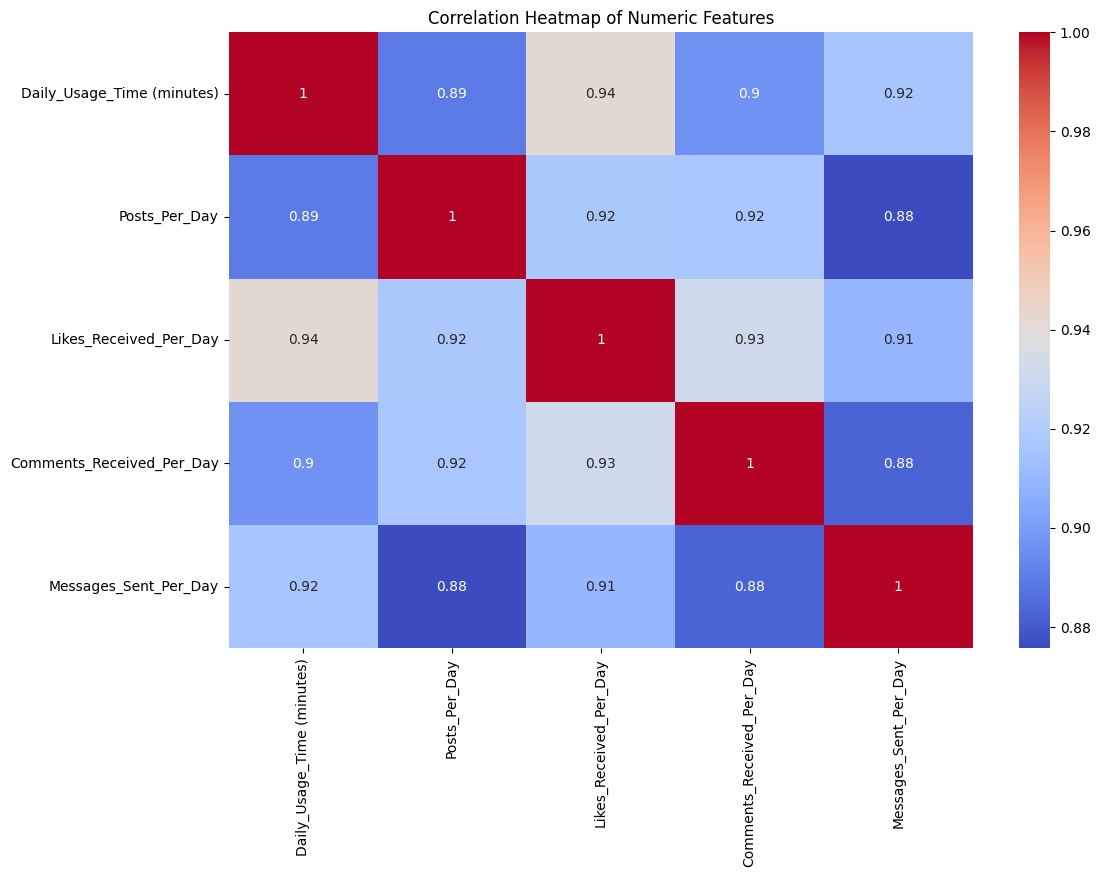

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


### **Part 2**: Data Preprocessing

## Handling Missing Values

We used mean to fill missing numeric values and mode for categorical columns (Gender, Platform, Dominant_Emotion).
This was done to avoid losing rows and keep the dataset complete for analysis









In [32]:

# Load your raw dataset
df = pd.read_csv(url)

# Drop completely empty rows
df = df.dropna(how='all')

# Show the new shape
print("Shape after cleaning:", df.shape)
df.head()



Shape after cleaning: (1001, 10)


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
1,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
3,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
5,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
7,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
9,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [33]:
# Numeric columns
numeric_cols = [
    "Age",
    "Daily_Usage_Time (minutes)",
    "Posts_Per_Day",
    "Likes_Received_Per_Day",
    "Comments_Received_Per_Day",
    "Messages_Sent_Per_Day"
]

# Convert to numeric (convert text or invalid values into NaN)
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing numeric values with column mean
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

print("✅ Numeric columns cleaned and missing values filled.")

✅ Numeric columns cleaned and missing values filled.


The dataset did not originally contain any missing values.
However, the mean/mode imputation step was included as a standard preprocessing procedure
to ensure data completeness and fulfill project requirements.

## Encoding Categorical Data

We applied Label Encoding on categorical attributes (Gender, Platform, Dominant_Emotion)
to convert text values into numeric form that machine learning algorithms can process

In [34]:
# Categorical columns
categorical_cols = ["Gender", "Platform", "Dominant_Emotion"]

le = LabelEncoder()

# Convert text to numbers using LabelEncoder
for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

print("✅ Categorical columns encoded successfully.")

✅ Categorical columns encoded successfully.


## Normalization

We used Min–Max Normalization to scale all numeric attributes between 0 and 1,
ensuring that each feature contributes equally to the model

In [35]:
# Apply Min-Max normalization to numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("✅ Numeric columns normalized (0–1 scale).")

✅ Numeric columns normalized (0–1 scale).


## Remove User_ID column (not needed for mining)

In [36]:
if "User_ID" in df.columns:
    df = df.drop(columns=["User_ID"])
    print("✅ 'User_ID' column removed.")

✅ 'User_ID' column removed.


## Save the final cleaned dataset

In [37]:

df.to_csv("Preprocessed_dataset.csv", index=False)
print("✅ File saved as Preprocessed_dataset.csv")

✅ File saved as Preprocessed_dataset.csv
